In [1]:
#B.Pagli 04/2023
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import CRO
from CRO import RO_solver, RO_par_load
from math import floor

In [2]:
#Set of parameters indicated in RO Solving Method Evaluation_v3.0.docx



IC = [0.02,0.05] #Initial condition, arbitrary choice here
N = 100*12 #Lenght of the time series in month
NE = 5 #NB of members to generate
EF = {'E_T':0.0,'E_h':0.0} #External forcing, null here.
NM='EH' # numerical scheme
dt=0.1 #dt used in RO solver in month
saveat=1. #saved every saveat*dt

#To test noise_custom
t_tot = np.array([j*dt for j in range(floor((N-1)/dt)+1)])

par = {'R': [-0.08,0.1,5*np.pi/4],
   'F1': 0.02,
   'F2': 0.9,
   'epsilon': 0.03,
   'b_T': 0.03,
   'c_T': 0.1,
   'd_T': 0.005,
   'b_h': 0.1,
   'sigma_T': 0.2,
   'sigma_h': 1.2,
   'B': 0.5,
   'm_T': 2.0,
   'm_h': 2.0,
   'n_T': 0,
   'n_h': 0,
   'n_g': 0}


w_T=np.random.normal(0, 1, size = t_tot.size)
w_h=np.random.normal(0, 1, size = t_tot.size)
w_xi_T=np.random.normal(0, 1, size = t_tot.size)
w_xi_h=np.random.normal(0, 1, size = t_tot.size)

noise_custom=[w_T,w_h,w_xi_T,w_xi_h]

t=t_tot[::int(round(saveat / dt))]


#Call the RO solver function, the set of parameters par, and the different arguments
#This returns an ensemble of NE members of T,h and the white noises used for integration of dT/dt, dh/dt, dxi_T/dt, dxi_h/dt
T,h,noise = RO_solver(par=par,IC=IC,N=N,NE=NE,EF=EF,NM=NM,dt=dt,saveat=saveat,noise_custom=[])




Sample 1/5
Sample 2/5
Sample 3/5
Sample 4/5
Sample 5/5


Text(0.5, 1.0, 'Time Series of T and h')

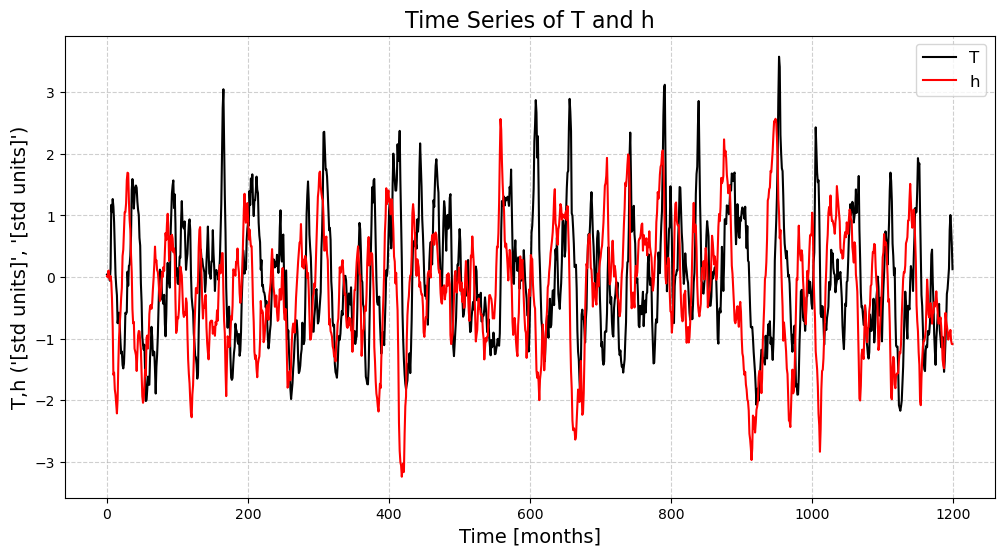

In [3]:
#plot for one member of the synthetic RO ensemble the phase space and T,h time series

normalized=True
idx_ens=2
if normalized:
    unit_T = '[std units]'
    unit_h = '[std units]'
    T_idx = T[idx_ens]/(np.std(T[idx_ens]))
    h_idx =  h[idx_ens]/(np.std(h[idx_ens]))
else:
    unit_T = '[K]'
    unit_h = '[m]'
    T_idx = T[idx_ens]
    h_idx =  h[idx_ens]

fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(t, T_idx, 'k', linewidth=1.5, label='T')
ax1.plot(t, h_idx, 'r', linewidth=1.5, label='h')

ax1.set_xlabel('Time [months]', fontsize=14)
ax1.set_ylabel(f'T,h {unit_T,unit_h}', fontsize=14)
ax1.legend(fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.set_title('Time Series of T and h', fontsize=16)
